In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.stats import linregress
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

In [2]:
mpl.rc('pdf',fonttype = 42)

# Read in data

In [3]:
Alldata = pd.read_excel('../Data/palynology/SUMMARY_PALY_DATA.xlsx',sheet_name='4cores_edit', skiprows = 0)
Alldata

,Formation,well,depth (ft),sample,OM type,Unnamed: 5,basic sphaeromorphs,striate cell walls,complex walls,discoids,...,Unnamed: 18,cf. Siphonophycus,Eohalothece B,Eohalothece P,trichomes,Eomycetopsis-like,Glenobotrydion sp.,Mats,Unnamed: 26,EU species / PRO species
0,Freda Ss,PC-1,209.50,PC1-210,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
1,Freda Ss,PC-1,239.70,PC1-240,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2,Freda Ss,PC-1,250.50,PC1-251,B,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,Nonesuch Sh,PC-1,285.20,PC1-285,P,NaN,3.0,1.0,1.0,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Nonesuch Sh,PC-1,295.80,PC1-296,P,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Nonesuch Sh,WPB-4,445.70,NON09-32,P,NaN,9.0,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,Nonesuch Sh,WPB-4,480.30,NON09-33,AP,NaN,5.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,Nonesuch Sh,WPB-4,539.60,NON09-34,S,NaN,3.0,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,Nonesuch Sh,WPB-4,567.25,NON09-35,A,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


In [4]:
Alldata['basic sphaeromorphs'] = Alldata['basic sphaeromorphs'].fillna(0)
Alldata['striate cell walls'] = Alldata['striate cell walls'].fillna(0)
Alldata['complex walls'] = Alldata['complex walls'].fillna(0)
Alldata['discoids'] = Alldata['discoids'].fillna(0)
Alldata['other acritarchs'] = Alldata['other acritarchs'].fillna(0)
Alldata['complex protists'] = Alldata['complex protists'].fillna(0)
Alldata['elongates'] = Alldata['elongates'].fillna(0)
Alldata['multicellular forms'] = Alldata['multicellular forms'].fillna(0)
Alldata['prokaryotes'] = Alldata['prokaryotes'].fillna(0)

Need to get this number in for ease later

In [5]:
#Alldata['prokaryotes'] = Alldata['prokaryotes'].fillna(0)
Alldata['Pro%']=Alldata['prokaryotes']/Alldata['"species" count']
#Alldata

In [6]:
PC1_data = Alldata[Alldata["well"] == "PC-1"] 
DO8_data = Alldata[Alldata["well"] == "DO-8"] 
WC9_data = Alldata[Alldata["well"] == "WC-9"] 
WPB4_data = Alldata[Alldata["well"] == "WPB-4"] 

PC1_data.reset_index(drop=True,inplace=True)
WC9_data.reset_index(drop=True,inplace=True)
DO8_data.reset_index(drop=True, inplace=True)
WPB4_data.reset_index(drop=True, inplace=True)

In [7]:
PC1_data.columns

Index(['Formation', 'well', 'depth (ft)', 'sample', 'OM type', 'Unnamed: 5',
       'basic sphaeromorphs', 'striate cell walls', 'complex walls',
       'discoids', 'other acritarchs', 'complex protists', 'elongates',
       'multicellular forms', 'prokaryotes', 'Unnamed: 15', '"species" count',
       'Facies', 'Unnamed: 18', 'cf. Siphonophycus', 'Eohalothece B',
       'Eohalothece P', 'trichomes', 'Eomycetopsis-like', 'Glenobotrydion sp.',
       'Mats', 'Unnamed: 26', 'EU species / PRO species', 'Pro%'],
      dtype='object')

In [8]:
PC1_data.loc[PC1_data.Facies == 1.0, 'color'] = "#82CA9C"
PC1_data.loc[PC1_data.Facies == 2.0, 'color'] = "#919396"
PC1_data.loc[PC1_data.Facies == 3.0, 'color'] = "#F27179"
PC1_data.loc[PC1_data.Facies == 0.0, 'color'] = "#000000"

DO8_data.loc[DO8_data.Facies == 1.0, 'color'] = "#82CA9C"
DO8_data.loc[DO8_data.Facies == 2.0, 'color'] = "#919396"
DO8_data.loc[DO8_data.Facies == 3.0, 'color'] = "#F27179"
DO8_data.loc[DO8_data.Facies == 0.0, 'color'] = "#000000"

WC9_data.loc[WC9_data.Facies == 1.0, 'color'] = "#82CA9C"
WC9_data.loc[WC9_data.Facies == 2.0, 'color'] = "#919396"
WC9_data.loc[WC9_data.Facies == 3.0, 'color'] = "#F27179"
WC9_data.loc[WC9_data.Facies == 0.0, 'color'] = "#000000"

WPB4_data.loc[WPB4_data.Facies == 0.0, 'color'] = "#000000"

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90363/963163167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC1_data.loc[PC1_data.Facies == 1.0, 'color'] = "#82CA9C"
/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90363/963163167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DO8_data.loc[DO8_data.Facies == 1.0, 'color'] = "#82CA9C"
/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90363/963163167.py:11: SettingWithCopyWarning: 
A value is trying to be set on a co

# Stratigraphic plots

PC1- stratigraphy (Scaled to same as Facies diagram)

In [9]:
-(0/0.3048 - 917)

917.0

Plotting Everything First

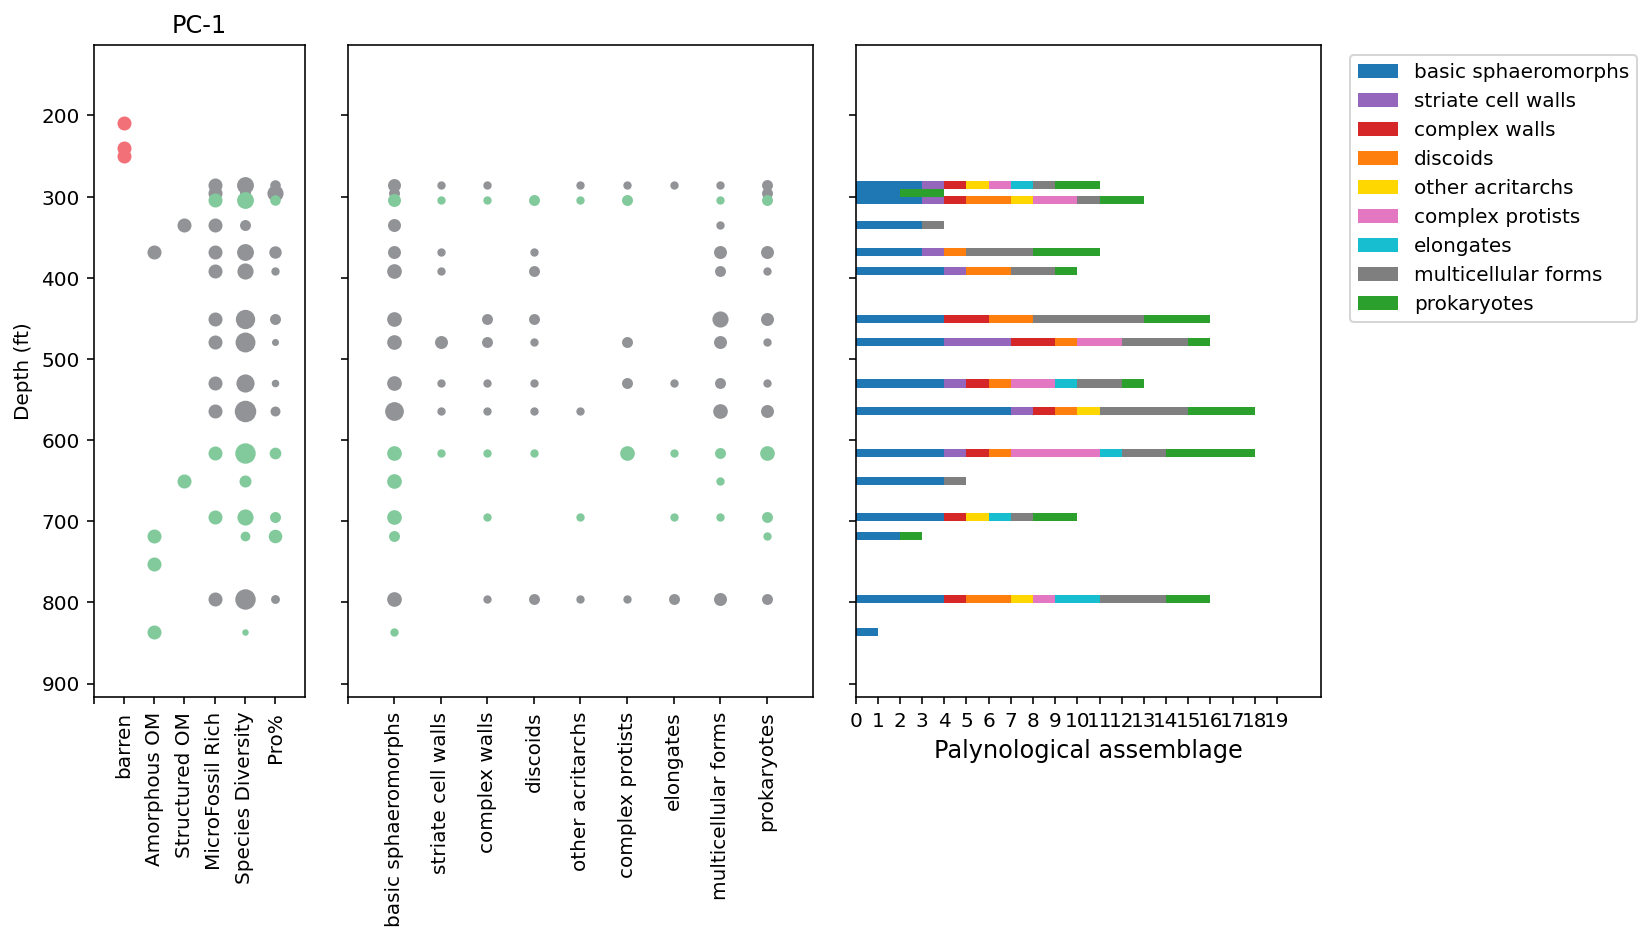

In [10]:
height = 10 #change height of bar, .8 is default

plt.figure(figsize=(11,6))
plt.subplot(1,5,1)
for n in PC1_data.index:
    if PC1_data['OM type'][n]=='P':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='SP':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='AP':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='S':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='SP':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='A':
        plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='AP':
        plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='B':
        plt.scatter(1,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    plt.scatter(5,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]], s=[PC1_data['"species" count'][n]*5])
    plt.scatter(6,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]], s=[PC1_data['Pro%'].fillna(0)[n]*100]) 
    
    plt.ylim(917,113.19422572178485)
    plt.xlim(0,7)
    plt.xticks(np.arange(7),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich', 'Species Diversity', 'Pro%'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('PC-1')
        
ax3 = plt.subplot2grid((1, 5), (0, 1), colspan=2)
for n in PC1_data.index:
    if PC1_data['basic sphaeromorphs'][n]!='NaN':
        ax3.scatter(1, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['basic sphaeromorphs'][n]*10])
    if PC1_data['striate cell walls'][n]!='NaN':
        ax3.scatter(2, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['striate cell walls'][n]*10])
    if PC1_data['complex walls'][n]!='NaN':
        ax3.scatter(3, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['complex walls'][n]*10])
    if PC1_data['discoids'][n]!='NaN':
        ax3.scatter(4, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['discoids'][n]*10])
    if PC1_data['other acritarchs'][n]!='NaN':
        ax3.scatter(5, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['other acritarchs'][n]*10])
    if PC1_data['complex protists'][n]!='NaN':
        ax3.scatter(6, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['complex protists'][n]*10])
    if PC1_data['elongates'][n]!='NaN':
        ax3.scatter(7, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['elongates'][n]*10])
    if PC1_data['multicellular forms'][n]!='NaN':
        ax3.scatter(8, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['multicellular forms'][n]*10])       
    if PC1_data['prokaryotes'][n]!='NaN':
        ax3.scatter(9, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['prokaryotes'][n]*10])     
    ax3.set_ylim(917,113.19422572178485)
    ax3.set_xlim(0,10)
    ax3.set_xticks(np.arange(10))
    ax3.set_xticklabels(['','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
                             'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'], rotation=90)
    ax3.set_yticklabels([]) 
    
ax4 = plt.subplot2grid((1, 5), (0, 3), colspan=2) 
p1 = ax4.barh(PC1_data['depth (ft)'], PC1_data['basic sphaeromorphs'], height, color='tab:blue')
p2 = ax4.barh(PC1_data['depth (ft)'], PC1_data['striate cell walls'], height, left = PC1_data['basic sphaeromorphs'], color='tab:purple')
p3 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex walls'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(PC1_data['depth (ft)'], PC1_data['discoids'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(PC1_data['depth (ft)'], PC1_data['other acritarchs'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + PC1_data['discoids'][j] for j in range(len(PC1_data['depth (ft)']))], color='gold')
p6 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex protists'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + PC1_data['discoids'][j]+ 
                PC1_data['other acritarchs'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:pink')
p7 = ax4.barh(PC1_data['depth (ft)'], PC1_data['elongates'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + PC1_data['discoids'][j] + 
                PC1_data['other acritarchs'][j] + PC1_data['complex protists'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:cyan')
p8 = ax4.barh(PC1_data['depth (ft)'], PC1_data['multicellular forms'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + PC1_data['discoids'][j]+ 
                PC1_data['other acritarchs'][j] + PC1_data['complex protists'][j]+PC1_data['elongates'][j] 
    for j in range(len(PC1_data['depth (ft)']))], color='tab:gray')
p9 = ax4.barh(PC1_data['depth (ft)'], PC1_data['prokaryotes'], height, left = [PC1_data['basic sphaeromorphs'][j] + 
              PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + PC1_data['discoids'][j]+ 
                PC1_data['other acritarchs'][j] + PC1_data['complex protists'][j]+PC1_data['elongates'][j] 
                + PC1_data['multicellular forms'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:green')

ax4.set_xlabel('Palynological assemblage', fontsize = 'large')
ax4.set_ylim(917,113.19422572178485)
ax4.set_xticks(np.arange(20))
ax4.set_xlim(0,21)
ax4.set_yticklabels([]) 
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), ('basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
    'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")

    
#plt.savefig('code_output/PC-1_Microfossils_v3sall.svg')
#plt.savefig('code_output/PC-1_Microfossils_v3all.pdf')
plt.show()

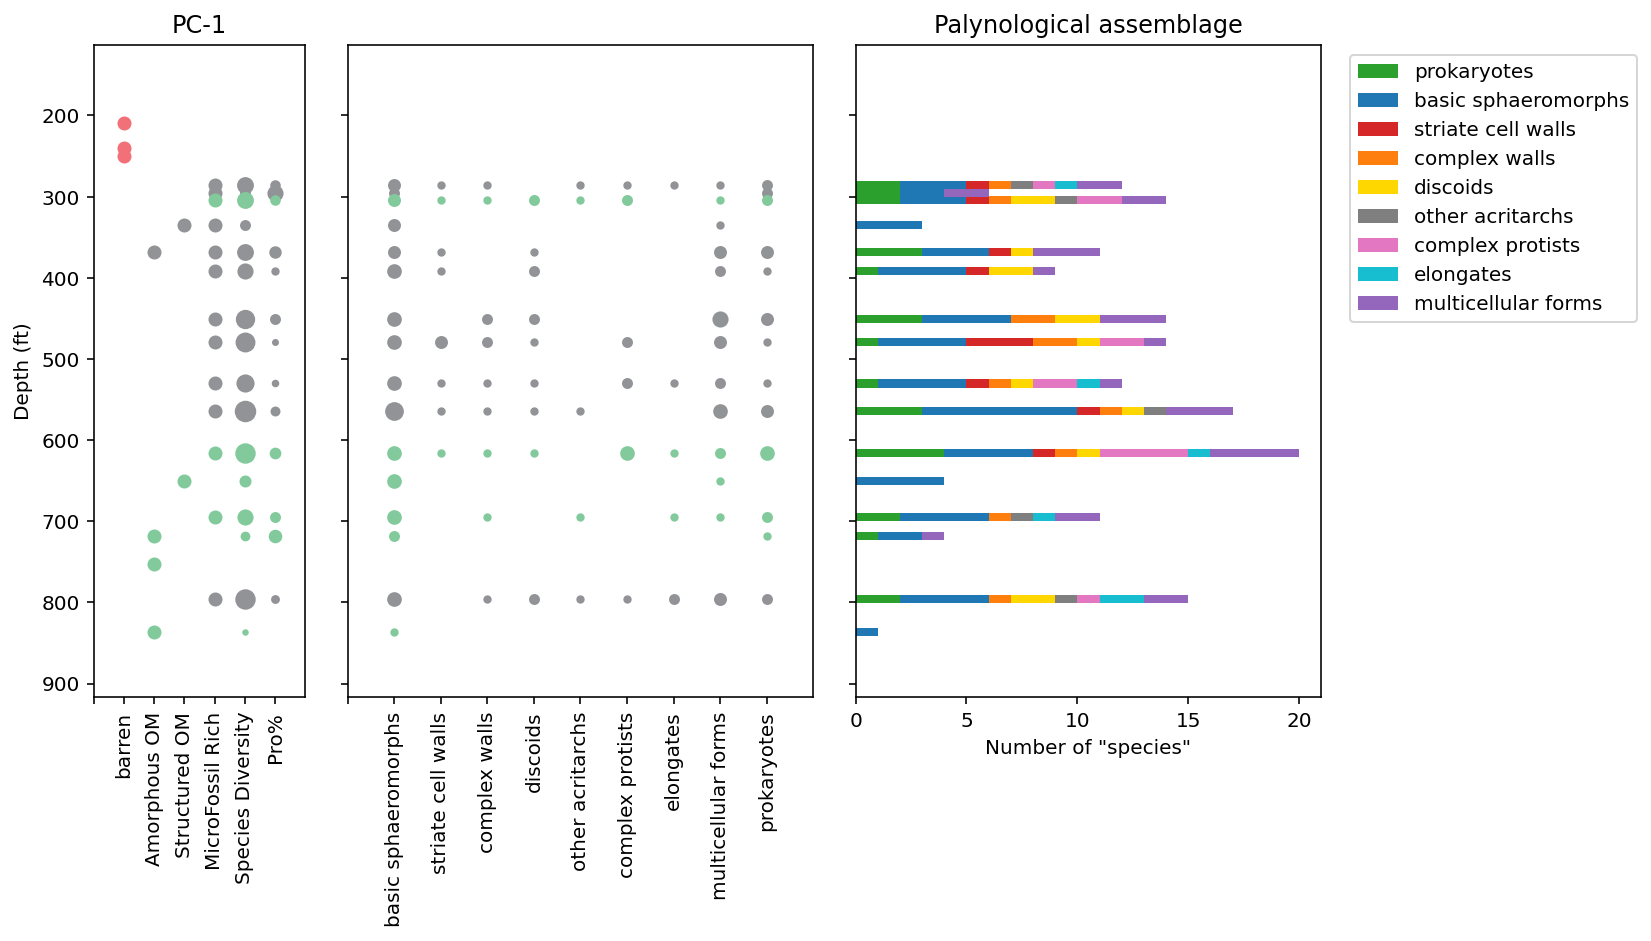

In [11]:
height = 10 #change height of bar, .8 is default

plt.figure(figsize=(11,6))
plt.subplot(1,5,1)
for n in PC1_data.index:
    if PC1_data['OM type'][n]=='P':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='SP':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='AP':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='S':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='SP':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='A':
        plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='AP':
        plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='B':
        plt.scatter(1,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    plt.scatter(5,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]], s=[PC1_data['"species" count'][n]*5])
    plt.scatter(6,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]], s=[PC1_data['Pro%'].fillna(0)[n]*100]) 
    
    plt.ylim(917,113.19422572178485)
    plt.xlim(0,7)
    plt.xticks(np.arange(7),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich', 'Species Diversity', 'Pro%'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('PC-1')
  
ax3 = plt.subplot2grid((1, 5), (0, 1), colspan=2)
for n in PC1_data.index:
    if PC1_data['basic sphaeromorphs'][n]!='NaN':
        ax3.scatter(1, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['basic sphaeromorphs'][n]*10])
    if PC1_data['striate cell walls'][n]!='NaN':
        ax3.scatter(2, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['striate cell walls'][n]*10])
    if PC1_data['complex walls'][n]!='NaN':
        ax3.scatter(3, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['complex walls'][n]*10])
    if PC1_data['discoids'][n]!='NaN':
        ax3.scatter(4, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['discoids'][n]*10])
    if PC1_data['other acritarchs'][n]!='NaN':
        ax3.scatter(5, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['other acritarchs'][n]*10])
    if PC1_data['complex protists'][n]!='NaN':
        ax3.scatter(6, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['complex protists'][n]*10])
    if PC1_data['elongates'][n]!='NaN':
        ax3.scatter(7, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['elongates'][n]*10])
    if PC1_data['multicellular forms'][n]!='NaN':
        ax3.scatter(8, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['multicellular forms'][n]*10])       
    if PC1_data['prokaryotes'][n]!='NaN':
        ax3.scatter(9, PC1_data['depth (ft)'][n],c=PC1_data['color'][n],s=[PC1_data['prokaryotes'][n]*10])     
    ax3.set_ylim(917,113.19422572178485)
    ax3.set_xlim(0,10)
    ax3.set_xticks(np.arange(10))
    ax3.set_xticklabels(['','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
                             'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'], rotation=90)
    ax3.set_yticklabels([]) 

    ax4 = plt.subplot2grid((1, 5), (0, 3), colspan=2) 
p1 = ax4.barh(PC1_data['depth (ft)'], PC1_data['prokaryotes'], height, color='tab:green')
p2 = ax4.barh(PC1_data['depth (ft)'], PC1_data['basic sphaeromorphs'], height, left = PC1_data['prokaryotes'], color='tab:blue')
p3 = ax4.barh(PC1_data['depth (ft)'], PC1_data['striate cell walls'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex walls'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(PC1_data['depth (ft)'], PC1_data['discoids'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='gold')
p6 = ax4.barh(PC1_data['depth (ft)'], PC1_data['other acritarchs'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:gray')
p7 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex protists'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:pink')
p8 = ax4.barh(PC1_data['depth (ft)'], PC1_data['elongates'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j]+PC1_data['complex protists'][j] 
                for j in range(len(PC1_data['depth (ft)']))], color='tab:cyan')
p9 = ax4.barh(PC1_data['depth (ft)'], PC1_data['prokaryotes'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j]+PC1_data['complex protists'][j] 
                + PC1_data['elongates'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:purple')
ax4.set_title('Palynological assemblage')
ax4.set_ylim(917,113.19422572178485)
ax4.set_yticklabels([])
ax4.set_xticks((0, 5, 10, 15, 20))
ax4.set_xlabel('Number of "species"') 
ax4.set_xlim(0,21) 
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), ('prokaryotes','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
            'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")

    
#plt.savefig('code_output/PC-1_Microfossils_v4sall.svg')
plt.savefig('code_output/PC-1_Microfossils_v4all.pdf')
plt.show()

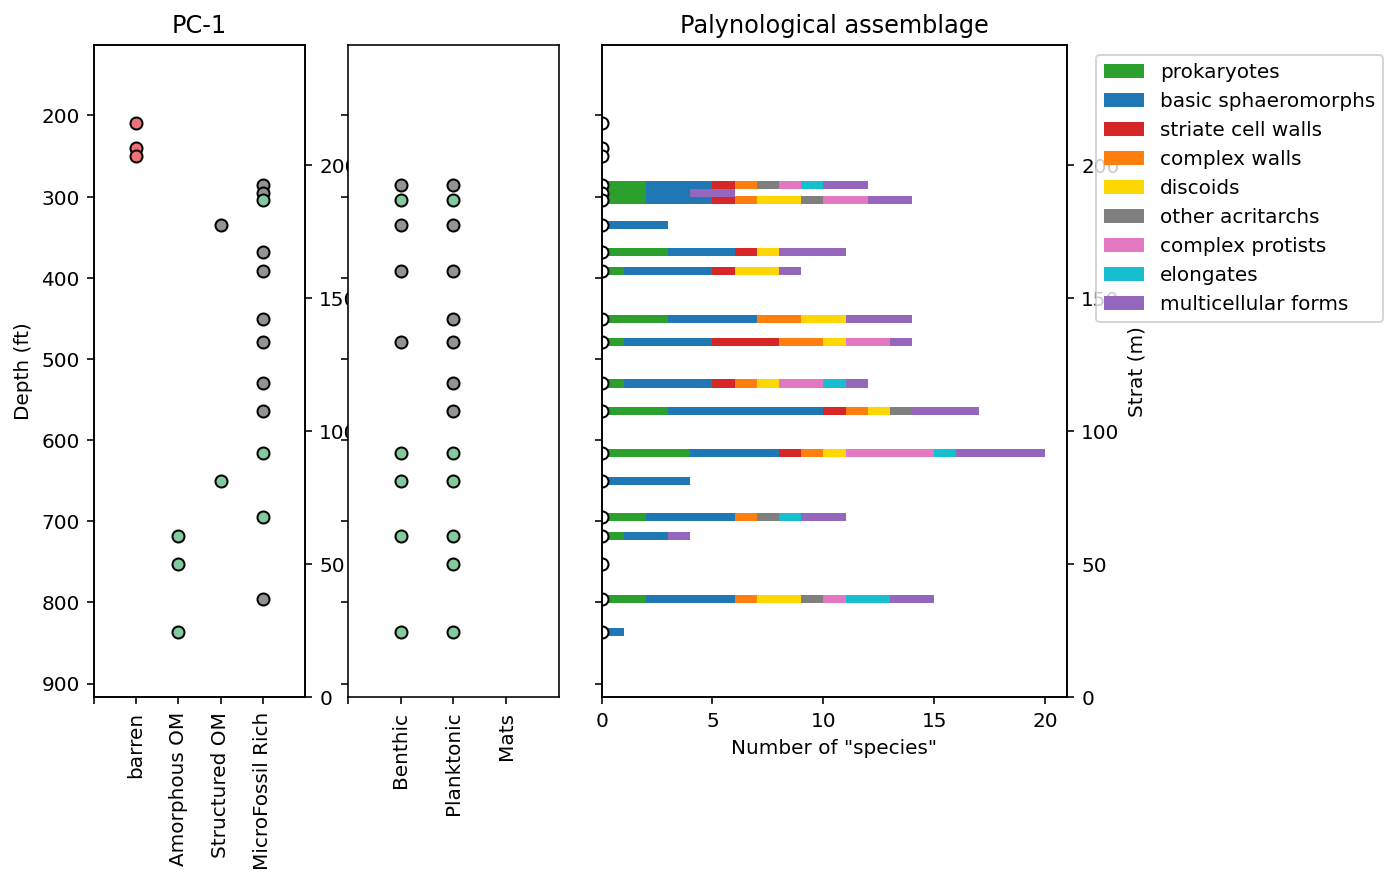

In [12]:
height = 10 #change height of bar, .8 is default
array = np.zeros([1,len(PC1_data)])

plt.figure(figsize=(11,6))
ax1 = plt.subplot(1,5,1)
for n in PC1_data.index:
    if PC1_data['OM type'][n]=='P':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]], edgecolors='black')
#     if PC1_data['OM type'][n]=='SP':
#         plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='AP':
        plt.scatter(4,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]],edgecolors='black')
    if PC1_data['OM type'][n]=='S':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]],edgecolors='black')
    if PC1_data['OM type'][n]=='SP':
        plt.scatter(3,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]],edgecolors='black')
    if PC1_data['OM type'][n]=='A':
        plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]],edgecolors='black')
#     if PC1_data['OM type'][n]=='AP':
#         plt.scatter(2,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]])
    if PC1_data['OM type'][n]=='B':
        plt.scatter(1,PC1_data['depth (ft)'][n],c=[PC1_data['color'][n]],edgecolors='black')
    plt.ylim(917,113.19422572178485)
    plt.xlim(0,5)
    plt.xticks(np.arange(5),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('PC-1')
ax2 = ax1.twinx()
ax2.set_ylabel('Strat (m)')
ax2.set_ylim(0,245)

ax3 = plt.subplot(1,5,2)
for n in PC1_data.index:
    if PC1_data['Eohalothece B'][n]==1 or PC1_data['Eohalothece P'][n]==1 or PC1_data['Glenobotrydion sp.'][n]==1 :
        ax3.scatter(2, PC1_data['depth (ft)'][n],c=PC1_data['color'][n], edgecolors='black')
    if PC1_data['cf. Siphonophycus'][n]==1 or PC1_data['Eomycetopsis-like'][n]==1:
        ax3.scatter(1, PC1_data['depth (ft)'][n],c=PC1_data['color'][n], edgecolors='black')
    if PC1_data['Mats'][n]==1:
        ax3.scatter(3, PC1_data['depth (ft)'][n],c=PC1_data['color'][n], edgecolors='black')
    ax3.set_ylim(917,113.19422572178485)
    ax3.set_xlim(0,4)
    ax3.set_xticks(np.arange(4))
    ax3.set_xticklabels(['','Benthic', 'Planktonic', 'Mats'], rotation=90)
    ax3.set_yticklabels([]) 

ax4 = plt.subplot2grid((1, 5), (0, 2), colspan=2) 
p1 = ax4.barh(PC1_data['depth (ft)'], PC1_data['prokaryotes'], height, color='tab:green')
p2 = ax4.barh(PC1_data['depth (ft)'], PC1_data['basic sphaeromorphs'], height, left = PC1_data['prokaryotes'], color='tab:blue')
p3 = ax4.barh(PC1_data['depth (ft)'], PC1_data['striate cell walls'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex walls'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(PC1_data['depth (ft)'], PC1_data['discoids'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] for j in range(len(PC1_data['depth (ft)']))], color='gold')
p6 = ax4.barh(PC1_data['depth (ft)'], PC1_data['other acritarchs'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:gray')
p7 = ax4.barh(PC1_data['depth (ft)'], PC1_data['complex protists'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j] + 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:pink')
p8 = ax4.barh(PC1_data['depth (ft)'], PC1_data['elongates'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j]+PC1_data['complex protists'][j] 
                for j in range(len(PC1_data['depth (ft)']))], color='tab:cyan')
p9 = ax4.barh(PC1_data['depth (ft)'], PC1_data['prokaryotes'], height, left = [PC1_data['prokaryotes'][j] + 
              PC1_data['basic sphaeromorphs'][j] + PC1_data['striate cell walls'][j] + PC1_data['complex walls'][j]+ 
                PC1_data['discoids'][j] + PC1_data['other acritarchs'][j]+PC1_data['complex protists'][j] 
                + PC1_data['elongates'][j] for j in range(len(PC1_data['depth (ft)']))], color='tab:purple')
p10 = ax4.scatter(array, PC1_data['depth (ft)'],c='white', edgecolors='black')
ax4.set_title('Palynological assemblage')
ax4.set_ylim(917,113.19422572178485)
ax4.set_yticklabels([])
ax4.set_xticks((0, 5, 10, 15, 20))
ax4.set_xlabel('Number of "species"') 
ax4.set_xlim(0,21) 
ax5 = ax4.twinx()
ax5.set_ylabel('Strat (m)')
ax5.set_ylim(0,245)
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), 
           ('prokaryotes','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
            'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")

#plt.tight_layout()
#plt.savefig('code_output/PC-1_v7.svg')
plt.savefig('code_output/PC-1_Microfossils_v7.pdf')
plt.show()

DO-8 stratigraphy scaled to PC-1

In [13]:
6/(245/0.3048)*(1427.8039161120414-922.08720904304437)

3.774917199541967

In [14]:
6/(245/0.3048)*(1445-922.08720904304437)

3.90327719225339

function to convert depth to meters

In [15]:
(1473-922.08720904304437)*0.3048

167.9182186836801

In [16]:
def meter_to_DO8feet(x):
    return -1*((x * 0.3048)-1473)


def DO8feet_to_meter(x):
    return (1473-x) / 0.3048

In [17]:
DO8_data['prokaryotes']

0     1.0
1     3.0
2     2.0
3     2.0
4     2.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    2.0
11    0.0
Name: prokaryotes, dtype: float64

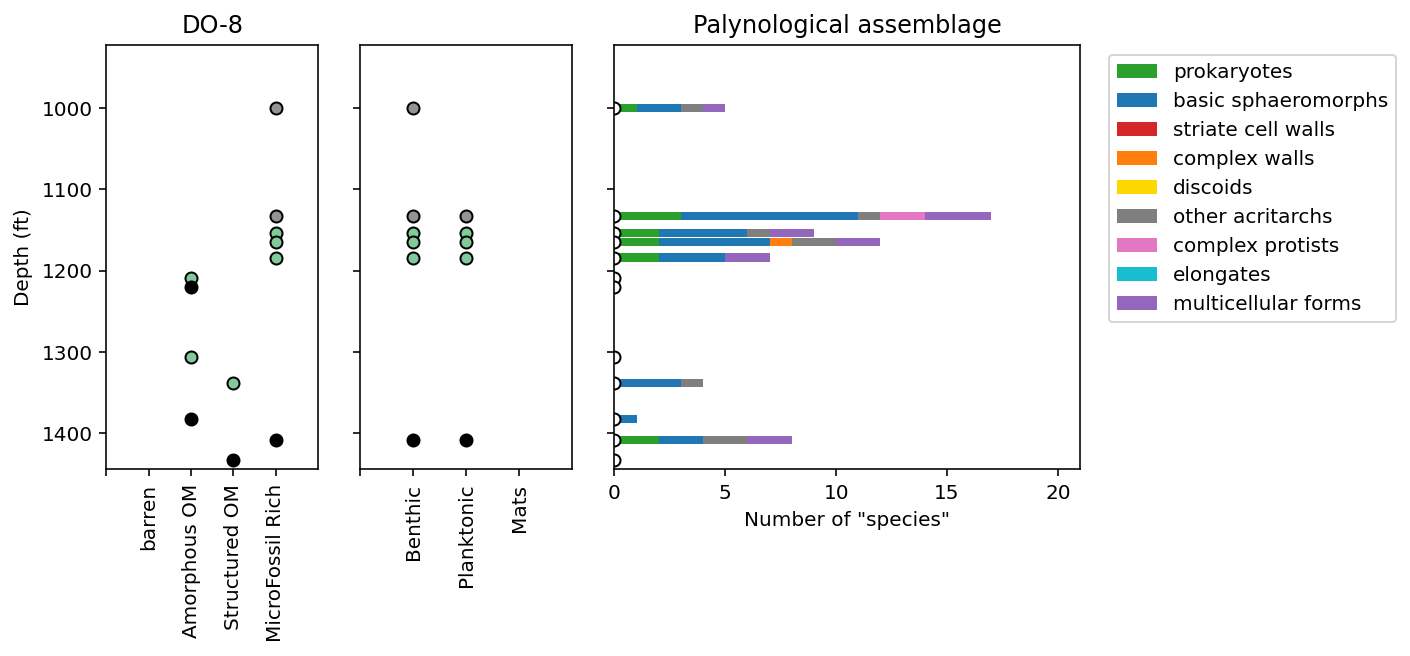

In [18]:
height = 10 #change height of bar, .8 is default
array = np.zeros([1,len(DO8_data)])

plt.figure(figsize=(11,3.90327719225339))
ax1 = plt.subplot(1,5,1)
for n in DO8_data.index:
    if DO8_data['OM type'][n]=='P':
        plt.scatter(4,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
#     if DO8_data['OM type'][n]=='SP':
#         plt.scatter(4,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]])
    if DO8_data['OM type'][n]=='AP':
        plt.scatter(4,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
    if DO8_data['OM type'][n]=='S':
        plt.scatter(3,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
    if DO8_data['OM type'][n]=='SP':
        plt.scatter(3,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
    if DO8_data['OM type'][n]=='A':
        plt.scatter(2,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
#     if DO8_data['OM type'][n]=='AP':
#         plt.scatter(2,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]])
    if DO8_data['OM type'][n]=='B':
        plt.scatter(1,DO8_data['depth (ft)'][n],c=[DO8_data['color'][n]],edgecolors='black')
#plt.ylim(1427.8039161120414,922.08720904304437)
    plt.ylim(1445,922.08720904304437)
    plt.xlim(0,5)
    plt.xticks(np.arange(5),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('DO-8')
    
ax3 = plt.subplot(1,5,2)
for n in DO8_data.index:
    if DO8_data['Eohalothece B'][n]==1 or DO8_data['Eohalothece P'][n]==1 or DO8_data['Glenobotrydion sp.'][n]==1 :
        ax3.scatter(2, DO8_data['depth (ft)'][n],c=DO8_data['color'][n], edgecolors='black')
    if DO8_data['cf. Siphonophycus'][n]==1 or DO8_data['Eomycetopsis-like'][n]==1:
        ax3.scatter(1, DO8_data['depth (ft)'][n],c=DO8_data['color'][n], edgecolors='black')
    if DO8_data['Mats'][n]==1:
        ax3.scatter(3, DO8_data['depth (ft)'][n],c=DO8_data['color'][n], edgecolors='black')
    ax3.set_ylim(1445,922.08720904304437)
    ax3.set_xlim(0,4)
    ax3.set_xticks(np.arange(4))
    ax3.set_xticklabels(['','Benthic', 'Planktonic', 'Mats'], rotation=90)
    ax3.set_yticklabels([]) 

ax4 = plt.subplot2grid((1, 5), (0, 2), colspan=2) 
p1 = ax4.barh(DO8_data['depth (ft)'], DO8_data['prokaryotes'], height, color='tab:green')
p2 = ax4.barh(DO8_data['depth (ft)'], DO8_data['basic sphaeromorphs'], height, left = DO8_data['prokaryotes'], color='tab:blue')
p3 = ax4.barh(DO8_data['depth (ft)'], DO8_data['striate cell walls'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] for j in range(len(DO8_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(DO8_data['depth (ft)'], DO8_data['complex walls'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] for j in range(len(DO8_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(DO8_data['depth (ft)'], DO8_data['discoids'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] + DO8_data['complex walls'][j] for j in range(len(DO8_data['depth (ft)']))], color='gold')
p6 = ax4.barh(DO8_data['depth (ft)'], DO8_data['other acritarchs'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] + DO8_data['complex walls'][j]+ 
                DO8_data['discoids'][j] for j in range(len(DO8_data['depth (ft)']))], color='tab:gray')
p7 = ax4.barh(DO8_data['depth (ft)'], DO8_data['complex protists'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] + DO8_data['complex walls'][j] + 
                DO8_data['discoids'][j] + DO8_data['other acritarchs'][j] for j in range(len(DO8_data['depth (ft)']))], color='tab:pink')
p8 = ax4.barh(DO8_data['depth (ft)'], DO8_data['elongates'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] + DO8_data['complex walls'][j]+ 
                DO8_data['discoids'][j] + DO8_data['other acritarchs'][j]+DO8_data['complex protists'][j] 
                for j in range(len(DO8_data['depth (ft)']))], color='tab:cyan')
p9 = ax4.barh(DO8_data['depth (ft)'], DO8_data['prokaryotes'], height, left = [DO8_data['prokaryotes'][j] + 
              DO8_data['basic sphaeromorphs'][j] + DO8_data['striate cell walls'][j] + DO8_data['complex walls'][j]+ 
                DO8_data['discoids'][j] + DO8_data['other acritarchs'][j]+DO8_data['complex protists'][j] 
                + DO8_data['elongates'][j] for j in range(len(DO8_data['depth (ft)']))], color='tab:purple')
p10 = ax4.scatter(array, DO8_data['depth (ft)'],c='white', edgecolors='black')
ax4.set_title('Palynological assemblage')
ax4.set_ylim(1445,922.08720904304437)
ax4.set_yticklabels([])
ax4.set_xticks((0, 5, 10, 15, 20))
ax4.set_xlabel('Number of "species"') 
ax4.set_xlim(0,21) 
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), 
           ('prokaryotes','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
            'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")

    
#plt.savefig('code_output/DO-8_Microfossils_v5.svg')
plt.savefig('code_output/DO-8_Microfossils_v5.pdf')
plt.show()

WC-9 plotting

In [19]:
6/(245/0.3048)*(1715.8585314354309-1101.1402872518622)

4.588558061073104

In [20]:
6/(245/0.3048)*(1732-1101.1402872518622)

4.709045888464467

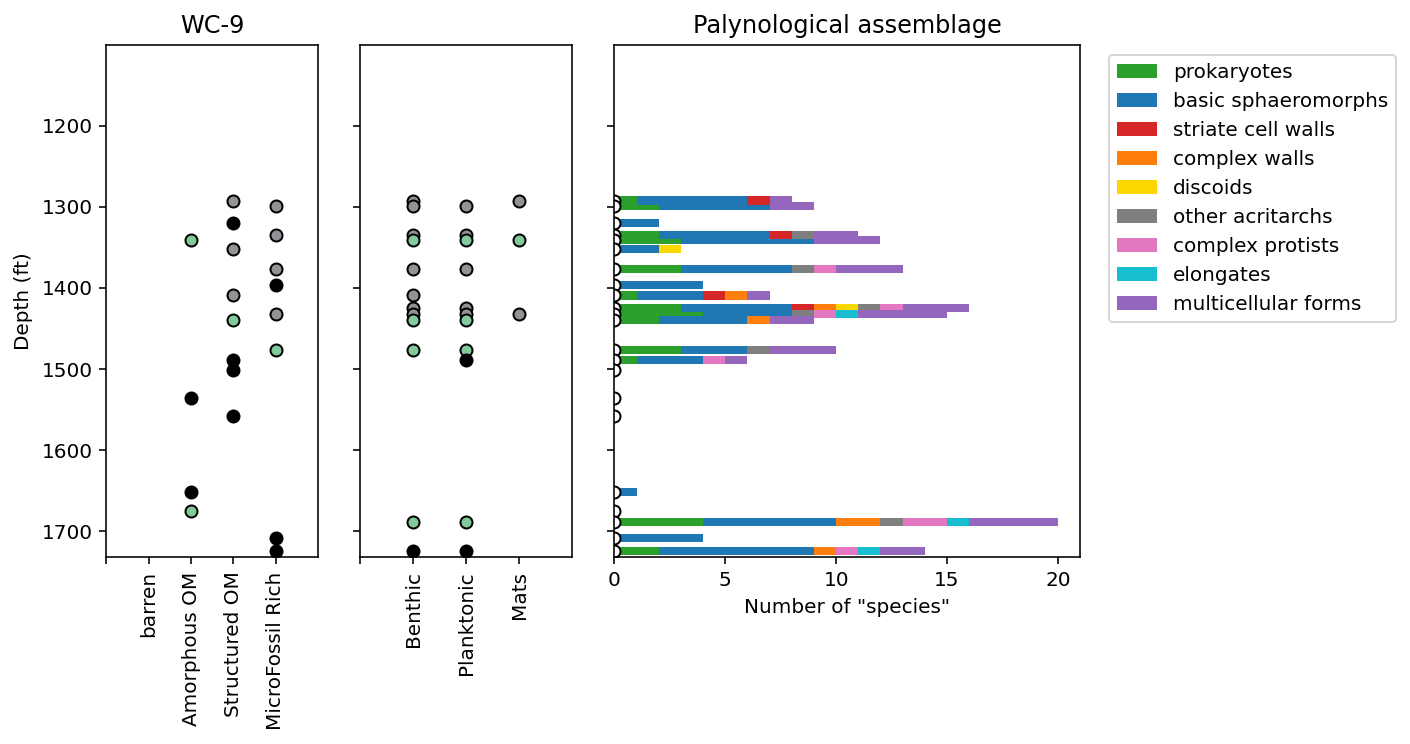

In [21]:
array = np.zeros([1,len(WC9_data)])

plt.figure(figsize=(11,4.709045888464467))
ax1 = plt.subplot(1,5,1)
for n in WC9_data.index:
    if WC9_data['OM type'][n]=='P':
        plt.scatter(4,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
#     if WC9_data['OM type'][n]=='SP':
#         plt.scatter(4,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]])
    if WC9_data['OM type'][n]=='AP':
        plt.scatter(4,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
    if WC9_data['OM type'][n]=='S':
        plt.scatter(3,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
    if WC9_data['OM type'][n]=='SP':
        plt.scatter(3,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
    if WC9_data['OM type'][n]=='SA':
        plt.scatter(3,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
    if WC9_data['OM type'][n]=='A':
        plt.scatter(2,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
#     if WC9_data['OM type'][n]=='AP':
#         plt.scatter(2,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]])
#     if WC9_data['OM type'][n]=='SA':
#         plt.scatter(2,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]])        
    if WC9_data['OM type'][n]=='B':
        plt.scatter(1,WC9_data['depth (ft)'][n],c=[WC9_data['color'][n]],edgecolors='black')
    #plt.ylim(1715.8585314354309,1101.1402872518622)
    plt.ylim(1732,1101.1402872518622)
    plt.xlim(0,5)
    plt.xticks(np.arange(5),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('WC-9')
    
ax3 = plt.subplot(1,5,2)
for n in WC9_data.index:
    if WC9_data['Eohalothece B'][n]==1 or WC9_data['Eohalothece P'][n]==1 or WC9_data['Glenobotrydion sp.'][n]==1 :
        ax3.scatter(2, WC9_data['depth (ft)'][n],c=WC9_data['color'][n], edgecolors='black')
    if WC9_data['cf. Siphonophycus'][n]==1 or WC9_data['Eomycetopsis-like'][n]==1:
        ax3.scatter(1, WC9_data['depth (ft)'][n],c=WC9_data['color'][n], edgecolors='black')
    if WC9_data['Mats'][n]==1:
        ax3.scatter(3, WC9_data['depth (ft)'][n],c=WC9_data['color'][n], edgecolors='black')
    ax3.set_ylim(1732,1101.1402872518622)
    ax3.set_xlim(0,4)
    ax3.set_xticks(np.arange(4))
    ax3.set_xticklabels(['','Benthic', 'Planktonic', 'Mats'], rotation=90)
    ax3.set_yticklabels([]) 
    
ax4 = plt.subplot2grid((1, 5), (0, 2), colspan=2) 
p1 = ax4.barh(WC9_data['depth (ft)'], WC9_data['prokaryotes'], height, color='tab:green')
p2 = ax4.barh(WC9_data['depth (ft)'], WC9_data['basic sphaeromorphs'], height, left = WC9_data['prokaryotes'], color='tab:blue')
p3 = ax4.barh(WC9_data['depth (ft)'], WC9_data['striate cell walls'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] for j in range(len(WC9_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(WC9_data['depth (ft)'], WC9_data['complex walls'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] for j in range(len(WC9_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(WC9_data['depth (ft)'], WC9_data['discoids'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] + WC9_data['complex walls'][j] for j in range(len(WC9_data['depth (ft)']))], color='gold')
p6 = ax4.barh(WC9_data['depth (ft)'], WC9_data['other acritarchs'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] + WC9_data['complex walls'][j]+ 
                WC9_data['discoids'][j] for j in range(len(WC9_data['depth (ft)']))], color='tab:gray')
p7 = ax4.barh(WC9_data['depth (ft)'], WC9_data['complex protists'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] + WC9_data['complex walls'][j] + 
                WC9_data['discoids'][j] + WC9_data['other acritarchs'][j] for j in range(len(WC9_data['depth (ft)']))], color='tab:pink')
p8 = ax4.barh(WC9_data['depth (ft)'], WC9_data['elongates'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] + WC9_data['complex walls'][j]+ 
                WC9_data['discoids'][j] + WC9_data['other acritarchs'][j]+WC9_data['complex protists'][j] 
                for j in range(len(WC9_data['depth (ft)']))], color='tab:cyan')
p9 = ax4.barh(WC9_data['depth (ft)'], WC9_data['prokaryotes'], height, left = [WC9_data['prokaryotes'][j] + 
              WC9_data['basic sphaeromorphs'][j] + WC9_data['striate cell walls'][j] + WC9_data['complex walls'][j]+ 
                WC9_data['discoids'][j] + WC9_data['other acritarchs'][j]+WC9_data['complex protists'][j] 
                + WC9_data['elongates'][j] for j in range(len(WC9_data['depth (ft)']))], color='tab:purple')
p10 = ax4.scatter(array, WC9_data['depth (ft)'],c='white', edgecolors='black')
ax4.set_title('Palynological assemblage')
ax4.set_ylim(1732,1101.1402872518622)
ax4.set_yticklabels([])
ax4.set_xticks((0, 5, 10, 15, 20))
ax4.set_xlabel('Number of "species"') 
ax4.set_xlim(0,21) 
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), 
           ('prokaryotes','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
            'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")
    
#plt.savefig('code_output/WC-9_Microfossils_v5.svg')
plt.savefig('code_output/WC-9_Microfossils_v5.pdf')
plt.show()

WPB-4 data plotting 

In [22]:
6/(245/0.3048)*(672-130)

4.045753469387756

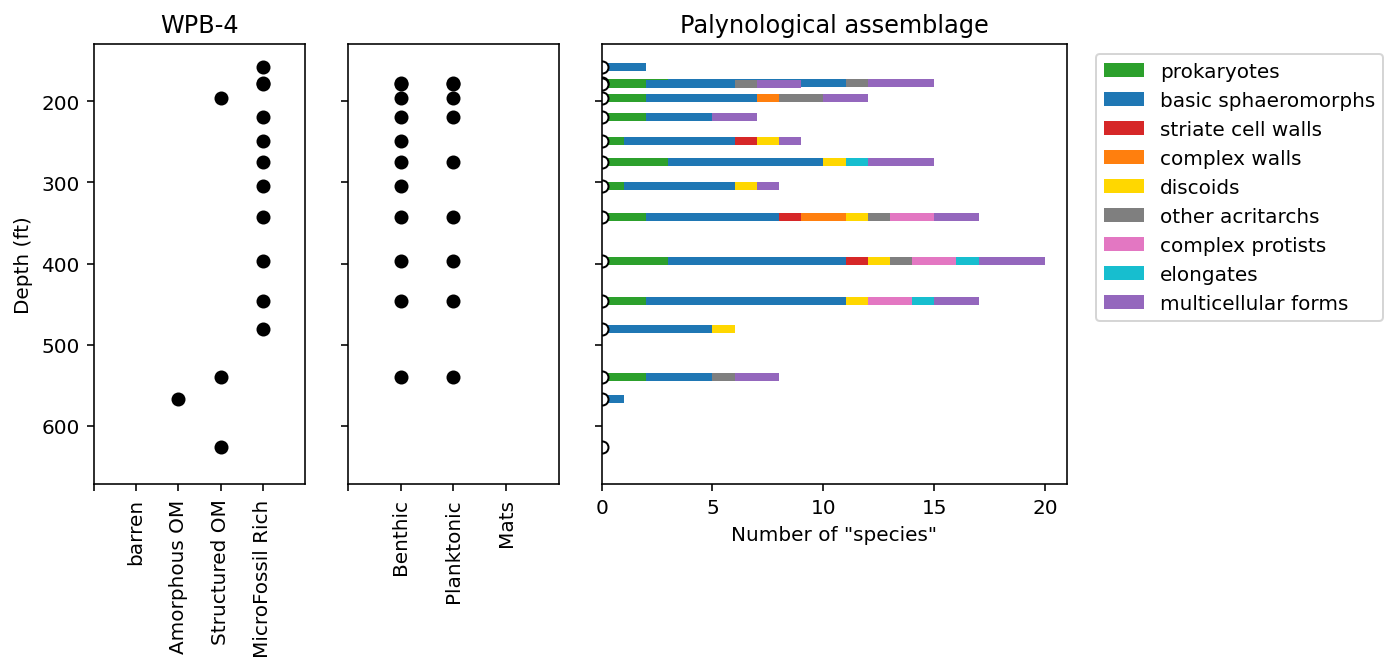

In [23]:
array = np.zeros([1,len(WPB4_data)])

plt.figure(figsize=(11,4.045753469387756))
ax1 = plt.subplot(1,5,1)
for n in WPB4_data.index:
    if WPB4_data['OM type'][n]=='P':
        plt.scatter(4,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
#     if WPB4_data['OM type'][n]=='SP':
#         plt.scatter(4,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]])
    if WPB4_data['OM type'][n]=='AP':
        plt.scatter(4,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
    if WPB4_data['OM type'][n]=='S':
        plt.scatter(3,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
    if WPB4_data['OM type'][n]=='SP':
        plt.scatter(3,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
    if WPB4_data['OM type'][n]=='SA':
        plt.scatter(3,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
    if WPB4_data['OM type'][n]=='A':
        plt.scatter(2,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
#     if WPB4_data['OM type'][n]=='AP':
#         plt.scatter(2,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]])
#     if WPB4_data['OM type'][n]=='SA':
#         plt.scatter(2,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]])        
    if WPB4_data['OM type'][n]=='B':
        plt.scatter(1,WPB4_data['depth (ft)'][n],c=[WPB4_data['color'][n]],edgecolors='black')
    plt.ylim(672,130)
    plt.xlim(0,5)
    plt.xticks(np.arange(5),['','barren', 'Amorphous OM', 'Structured OM', 'MicroFossil Rich'], rotation=90)
    plt.ylabel('Depth (ft)')
    plt.title('WPB-4')
    
ax3 = plt.subplot(1,5,2)
for n in WPB4_data.index:
    if WPB4_data['Eohalothece B'][n]==1 or WPB4_data['Eohalothece P'][n]==1 or WPB4_data['Glenobotrydion sp.'][n]==1 :
        ax3.scatter(2, WPB4_data['depth (ft)'][n],c=WPB4_data['color'][n], edgecolors='black')
    if WPB4_data['cf. Siphonophycus'][n]==1 or WPB4_data['Eomycetopsis-like'][n]==1:
        ax3.scatter(1, WPB4_data['depth (ft)'][n],c=WPB4_data['color'][n], edgecolors='black')
    if WPB4_data['Mats'][n]==1:
        ax3.scatter(3, WPB4_data['depth (ft)'][n],c=WPB4_data['color'][n], edgecolors='black')
    ax3.set_ylim(672,130)
    ax3.set_xlim(0,4)
    ax3.set_xticks(np.arange(4))
    ax3.set_xticklabels(['','Benthic', 'Planktonic', 'Mats'], rotation=90)
    ax3.set_yticklabels([])     

ax4 = plt.subplot2grid((1, 5), (0, 2), colspan=2) 
p1 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['prokaryotes'], height, color='tab:green')
p2 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['basic sphaeromorphs'], height, left = WPB4_data['prokaryotes'], color='tab:blue')
p3 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['striate cell walls'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] for j in range(len(WPB4_data['depth (ft)']))], color='tab:red')
p4 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['complex walls'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] for j in range(len(WPB4_data['depth (ft)']))], color='tab:orange')
p5 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['discoids'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] + WPB4_data['complex walls'][j] for j in range(len(WPB4_data['depth (ft)']))], color='gold')
p6 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['other acritarchs'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] + WPB4_data['complex walls'][j]+ 
                WPB4_data['discoids'][j] for j in range(len(WPB4_data['depth (ft)']))], color='tab:gray')
p7 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['complex protists'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] + WPB4_data['complex walls'][j] + 
                WPB4_data['discoids'][j] + WPB4_data['other acritarchs'][j] for j in range(len(WPB4_data['depth (ft)']))], color='tab:pink')
p8 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['elongates'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] + WPB4_data['complex walls'][j]+ 
                WPB4_data['discoids'][j] + WPB4_data['other acritarchs'][j]+WPB4_data['complex protists'][j] 
                for j in range(len(WPB4_data['depth (ft)']))], color='tab:cyan')
p9 = ax4.barh(WPB4_data['depth (ft)'], WPB4_data['prokaryotes'], height, left = [WPB4_data['prokaryotes'][j] + 
              WPB4_data['basic sphaeromorphs'][j] + WPB4_data['striate cell walls'][j] + WPB4_data['complex walls'][j]+ 
                WPB4_data['discoids'][j] + WPB4_data['other acritarchs'][j]+WPB4_data['complex protists'][j] 
                + WPB4_data['elongates'][j] for j in range(len(WPB4_data['depth (ft)']))], color='tab:purple')
p10 = ax4.scatter(array, WPB4_data['depth (ft)'],c='white', edgecolors='black')
ax4.set_title('Palynological assemblage')
ax4.set_ylim(672,130)
ax4.set_yticklabels([])
ax4.set_xticks((0, 5, 10, 15, 20))
ax4.set_xlabel('Number of "species"') 
ax4.set_xlim(0,21) 
plt.legend((p1[0], p2[0], p3[0],p4[0],p5[0], p6[0],p7[0],p8[0], p9[0]), 
           ('prokaryotes','basic sphaeromorphs', 'striate cell walls', 'complex walls', 'discoids',
            'other acritarchs','complex protists','elongates','multicellular forms','prokaryotes'),bbox_to_anchor=(1.04,1), loc="upper left")

    
#plt.savefig('code_output/WPB-4_Microfossils_v2.svg')
plt.savefig('code_output/WPB-4_Microfossils_v2.pdf')
plt.show()

# Total Comparisons

Separating Data out for bar Graph

In [24]:
Facies1_subset_A= Alldata[(Alldata['Facies'] == 1) & (Alldata['OM type'] == 'A')]
Facies1_subset_S= Alldata[(Alldata['Facies'] == 1) & (Alldata['OM type'] == 'S') 
                           | (Alldata['Facies'] == 1) & (Alldata['OM type'] == 'SA') 
                           | (Alldata['Facies'] == 1) & (Alldata['OM type'] == 'SP')]
Facies1_subset_P= Alldata[(Alldata['Facies'] == 1) & (Alldata['OM type'] == 'P') 
                           | (Alldata['Facies'] == 1) & (Alldata['OM type'] == 'AP')]

Facies2_subset_A= Alldata[(Alldata['Facies'] == 2) & (Alldata['OM type'] == 'A')]
Facies2_subset_S= Alldata[(Alldata['Facies'] == 2) & (Alldata['OM type'] == 'S') 
                           | (Alldata['Facies'] == 2) & (Alldata['OM type'] == 'SA') 
                           | (Alldata['Facies'] == 2) & (Alldata['OM type'] == 'SP')]
Facies2_subset_P= Alldata[(Alldata['Facies'] == 2) & (Alldata['OM type'] == 'P') 
                           | (Alldata['Facies'] == 2) & (Alldata['OM type'] == 'AP')]

In [25]:
counts_A = [len(Facies1_subset_A), len(Facies2_subset_A)]
counts_S = [len(Facies1_subset_S), len(Facies2_subset_S)]
counts_P = [len(Facies1_subset_P), len(Facies2_subset_P)]

Plot bar graph

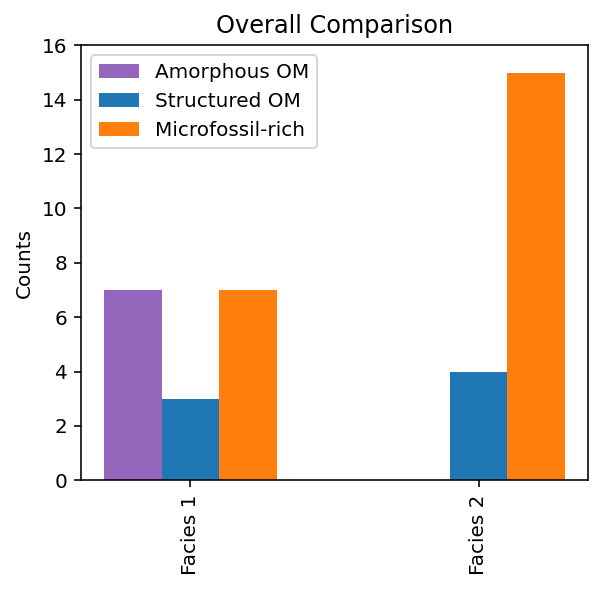

In [26]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
p1 = plt.bar(ind-width, counts_A, width, color='tab:purple')
p2 = plt.bar(ind, counts_S, width, color='tab:blue')
p3 = plt.bar(ind+width, counts_P, width, color='tab:orange')
plt.ylabel('Counts')
plt.title('Overall Comparison')
plt.xticks(ind, ('Facies 1', 'Facies 2'), rotation = 90)
plt.ylim(0,16)
#plt.yticks(yscale2, ylabel2)

plt.legend((p1[0],p2[0], p3[0]), ('Amorphous OM', 'Structured OM', 'Microfossil-rich'))
plt.savefig('code_output/Bargraph_v2.pdf')
plt.show()

Separating data out for species diversity & Pro%

In [27]:
Facies1= Alldata[Alldata['Facies'] == 1]
Facies1.reset_index(drop=True,inplace=True)
Facies2= Alldata[Alldata['Facies'] == 2]
Facies2.reset_index(drop=True,inplace=True)

In [28]:
datatoplot_species = [Facies1['"species" count'], Facies2['"species" count']]
datatoplot_propercent = [Facies1['Pro%'].dropna(), Facies2['Pro%']]
datatoplot_species

[0     11
 1     17
 2      5
 3     10
 4      3
 5      0
 6      1
 7      7
 8     12
 9      5
 10     0
 11     0
 12     4
 13    10
 14     9
 15     8
 16     0
 17    20
 Name: "species" count, dtype: int64,
 0     11
 1      4
 2      4
 3     11
 4     10
 5     15
 6     16
 7     13
 8     19
 9     17
 10     4
 11    17
 12     7
 13     8
 14    12
 15     5
 16    13
 17     8
 18    17
 19    14
 Name: "species" count, dtype: int64]

In [29]:
len(Facies2['"species" count'])

20

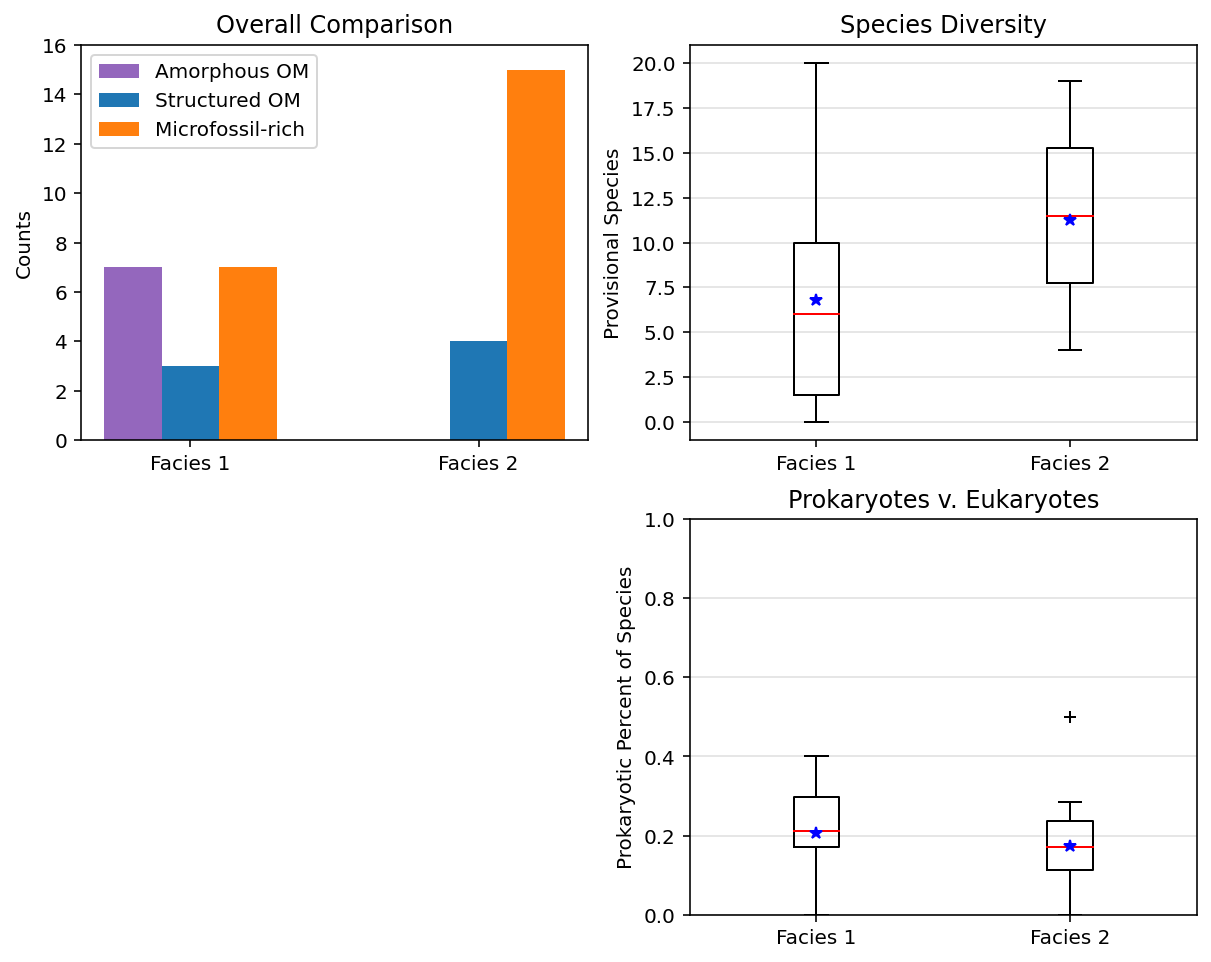

In [30]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['Facies 1', 'Facies 2']

plt.figure(figsize=(10,8))
plt.subplot(221)
p1 = plt.bar(ind-width, counts_A, width, color='tab:purple')
p2 = plt.bar(ind, counts_S, width, color='tab:blue')
p3 = plt.bar(ind+width, counts_P, width, color='tab:orange')
plt.ylabel('Counts')
plt.title('Overall Comparison')
plt.xticks(ind, ('Facies 1', 'Facies 2'))
plt.ylim(0,16)
plt.legend((p1[0],p2[0], p3[0]), ('Amorphous OM', 'Structured OM', 'Microfossil-rich'))
#plt.yticks(yscale2, ylabel2)

ax1 = plt.subplot(222)
ax1.boxplot(datatoplot_species, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax1.set_ylabel('Provisional Species')
ax1.set_title('Species Diversity')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

ax2 = plt.subplot(224)
ax2.boxplot(datatoplot_propercent, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax2.set_ylabel('Prokaryotic Percent of Species')
ax2.set_title('Prokaryotes v. Eukaryotes')
ax2.set_ylim(0,1)
ax2.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

plt.savefig('code_output/Bargraph&Boxplots_both_v2.pdf')
plt.show()

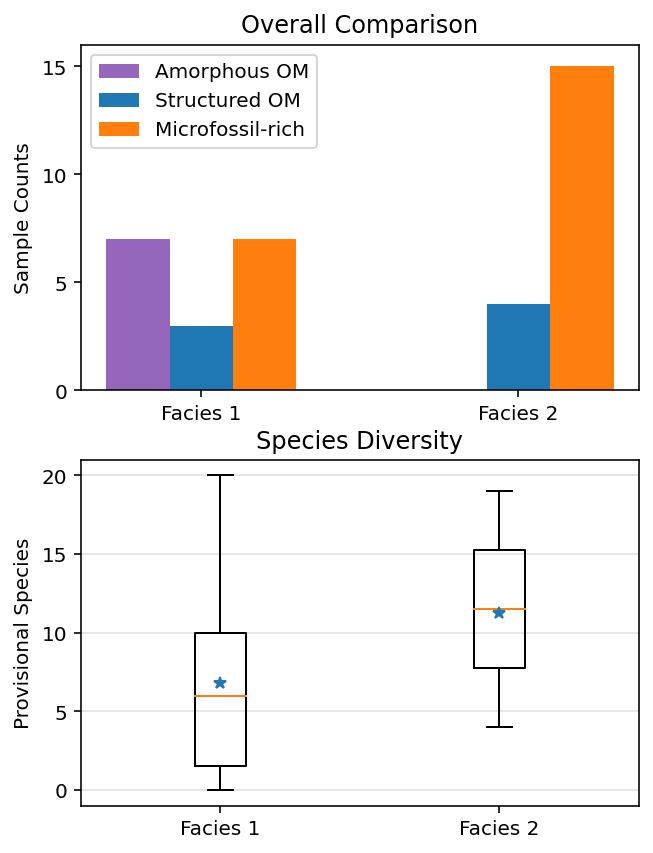

In [31]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['Facies 1', 'Facies 2']
y_labels = [0, 5, 10, 15]

plt.figure(figsize=(5,7))
plt.subplot(211)
p1 = plt.bar(ind-width, counts_A, width, color='tab:purple')
p2 = plt.bar(ind, counts_S, width, color='tab:blue')
p3 = plt.bar(ind+width, counts_P, width, color='tab:orange')
plt.ylabel('Sample Counts')
plt.title('Overall Comparison')
plt.xticks(ind, ('Facies 1', 'Facies 2'))
plt.ylim(0,16)
plt.yticks(y_labels)
plt.legend((p1[0],p2[0], p3[0]), ('Amorphous OM', 'Structured OM', 'Microfossil-rich'))
#plt.yticks(yscale2, ylabel2)

ax1 = plt.subplot(212)
ax1.boxplot(datatoplot_species, labels=labels, sym='+', medianprops=dict(color = 'tab:orange'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='tab:blue',markerfacecolor='tab:blue'))
ax1.set_ylabel('Provisional Species')
ax1.set_title('Species Diversity')
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

plt.savefig('code_output/Bargraph&Boxplot_v3.pdf')
plt.show()

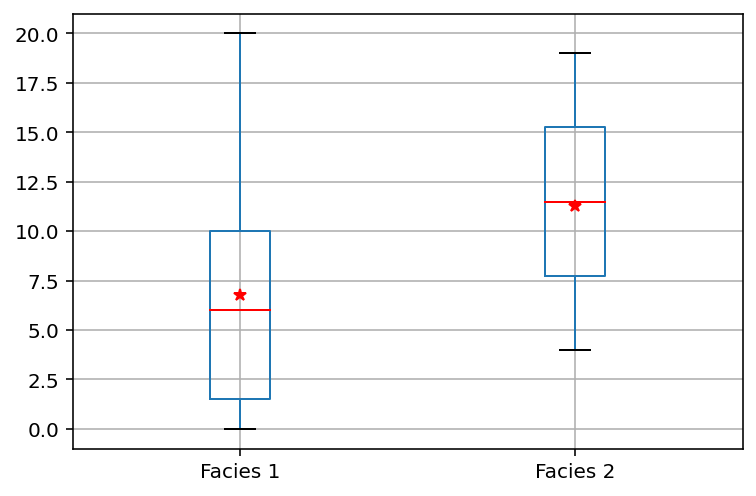

In [32]:
df = pd.concat((Facies1['"species" count'].rename('Facies 1'), Facies2['"species" count'].rename('Facies 2')), axis=1)
boxplot = df.boxplot(column=['Facies 1', 'Facies 2'], sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='red',markerfacecolor='red'))

/var/folders/57/lmgz7h4x11v34k53c6ldrlrw0000gn/T/ipykernel_90363/3801602632.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(y_label3)


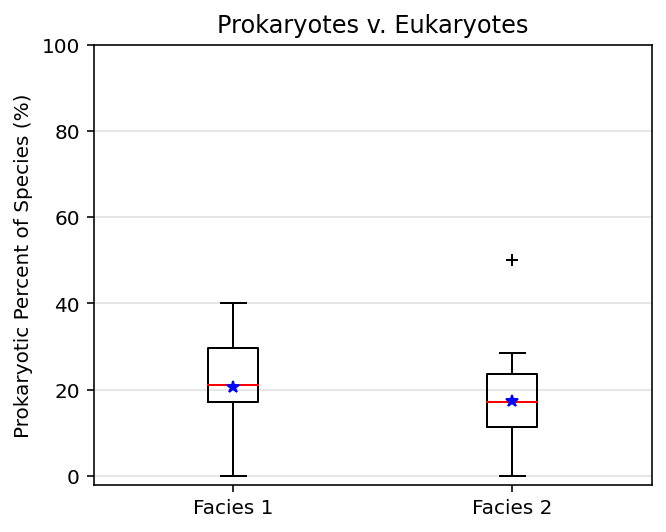

In [33]:
N = 2 #create Indices, change based on number plotting
ind = np.arange(N) # the x locations for the groups
width = 0.2 # the width of the bars, .8 is the default
labels = ['Facies 1', 'Facies 2']
y_label3 = [0, 0, 20, 40, 60, 80, 100]

plt.figure(figsize=(5,4.045753469387756))
ax4 = plt.subplot(111)
ax4.boxplot(datatoplot_propercent, labels=labels, sym='+', medianprops=dict(color = 'red'),widths= 0.18,
            showmeans=True, meanline=False, meanprops=dict(marker='*', markeredgecolor='blue',markerfacecolor='blue'))
ax4.set_ylabel('Prokaryotic Percent of Species (%)')
ax4.set_title('Prokaryotes v. Eukaryotes')
ax4.set_yticklabels(y_label3)
ax4.set_ylim(-0.02,1)
ax4.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=.7)

#plt.tight_layout()
plt.savefig('code_output/ProEukBoxplot_v1.pdf')
plt.show()